In [89]:
%load_ext autoreload
%autoreload 2
from get import *

{0: '00_toy_dataset', 1: '01_mnist_cc', 2: '02_mnist_constant_image', 3: '03_mnist_constant_image_random_row', 4: '04_mnist_uniform_color_random_row', 5: '05_mnist_uniform_color_low_mix_rate', 6: '06_mnist_sum', 7: '07_mnist_sum_bis', 8: '08_mnist_sum_noise_level', 12: '12_mnist_mysterious', 13: '13_mnist_mysterious', 23: '23_mnist_embed', 456: '456_mnist_embed', 888: '888_vehicle_animal', 999: '999_humans'}
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Labeled ds shape:  torch.Size([500, 2])
Unlabeled ds shape:  torch.Size([500, 2])
Validation ds shape:  torch.Size([500, 2])
Labels shape:  torch.Size([500])
Labeled ds labels:  [0. 1.]



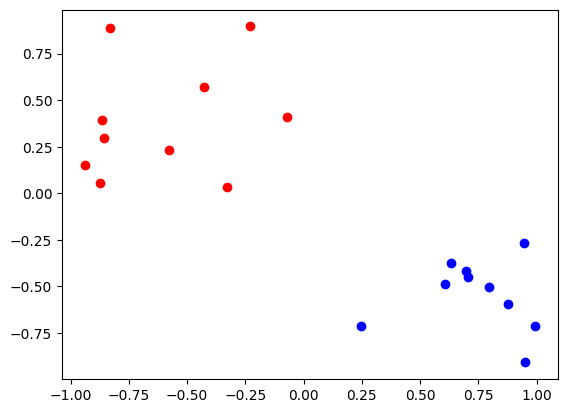

0: tensor([ 0.2965, -0.5976])
1: tensor([-0.6552, -0.8399])
2: tensor([ 0.7448, -0.0511])
3: tensor([ 0.2262, -0.9801])
4: tensor([-0.6856, -0.8305])
5: tensor([0.9247, 0.6153])
6: tensor([0.0367, 0.5429])
7: tensor([-0.8542,  0.8303])
8: tensor([0.2537, 0.7090])
9: tensor([-0.4936,  0.3664])
10: tensor([ 0.6074, -0.8953])
11: tensor([0.6356, 0.5657])
12: tensor([0.9579, 0.6910])
13: tensor([0.0037, 0.5982])
14: tensor([-0.0901,  0.0170])
15: tensor([ 0.5070, -0.5342])
16: tensor([-0.7351,  0.6907])
17: tensor([0.0938, 0.4543])
18: tensor([0.0925, 0.9615])
19: tensor([-0.8211, -0.6886])
20: tensor([-0.1640, -0.5487])
21: tensor([ 0.7066, -0.5764])
22: tensor([0.7123, 0.5851])
23: tensor([-0.8015, -0.6262])
24: tensor([-0.8186, -0.8667])
25: tensor([-0.4746,  0.9971])
26: tensor([ 0.7495, -0.9504])
27: tensor([-0.7422,  0.6705])
28: tensor([ 0.4400, -0.2693])
29: tensor([-0.7977,  0.6832])
30: tensor([0.2463, 0.1092])
31: tensor([-0.2879,  0.8033])
32: tensor([0.5778, 0.8524])
33: tenso

IndexError: index 500 is out of bounds for dimension 0 with size 500

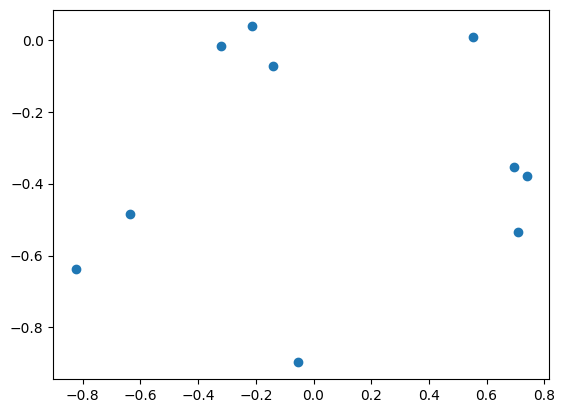

In [90]:
# Load dataset 0
X_labeled, y_labeled, X_unlabeled, X_val = load_datasets(n_dataset = 0)

display_dataset(n_dataset = 0)

In [ ]:
# Window function
def window_function0(X : torch.Tensor):
    """From a dataset, return the uncorellated modified dataset"""
    return X[:, 0].view(X.shape[0], 1)    # only takes first component

# Get uncorrelated data
uX_labeled = window_function0(X_labeled)
uX_unlabeled = window_function0(X_unlabeled)
uX_val = window_function0(X_val)
print(uX_val.shape, uX_labeled.shape, uX_unlabeled.shape)

torch.Size([500, 1]) torch.Size([500, 1]) torch.Size([500, 1])


In [ ]:
# Torch regression model
import torch

inputDim = 1       # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 10000

class LogisticRegression(torch.nn.Module):
     def __init__(self, input_dim, output_dim):
         super(LogisticRegression, self).__init__()
         self.linear = torch.nn.Linear(input_dim, output_dim)
     def forward(self, x):
         outputs = torch.sigmoid(self.linear(x))
         return outputs



model = LogisticRegression(inputDim, outputDim)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)


In [ ]:

losses = []
losses_test = []
Iterations = []
iter = 0
testing = False

# X_train, X_test, y_train, y_test = train_test_split(uX_labeled, y_labeled)
X_train, y_train = uX_labeled, y_labeled

print("X SHAPE:", X_train.shape)

for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), labels) 
    
    loss.backward() # Computes the gradient of the given tensor w.r.t. the weights/bias
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    
    
    if iter%1000==0:
        with torch.no_grad():
            if testing:
                # Calculating the loss and accuracy for the test dataset
                correct_test = 0
                total_test = 0
                outputs_test = torch.squeeze(model(X_test))
                loss_test = criterion(outputs_test, y_test)
                
                predicted_test = outputs_test.round().detach().numpy()
                total_test += y_test.size(0)
                correct_test += np.sum(predicted_test == y_test.detach().numpy())
                accuracy_test = 100 * correct_test/total_test
                losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")
    iter+=1

X SHAPE: torch.Size([500, 1])


Training Epochs:   0%|          | 0/10000 [00:00<?, ?it/s]

Iteration: 0. 
Test - Loss: 0.39978164434432983. Accuracy: 28.8
Train -  Loss: 0.42531800270080566. Accuracy: 24.0

Iteration: 1000. 
Test - Loss: 0.14473453164100647. Accuracy: 93.6
Train -  Loss: 0.15291741490364075. Accuracy: 91.2

Iteration: 2000. 
Test - Loss: 0.0762183666229248. Accuracy: 97.6
Train -  Loss: 0.07735322415828705. Accuracy: 99.73333333333333

Iteration: 3000. 
Test - Loss: 0.0549057200551033. Accuracy: 100.0
Train -  Loss: 0.0543699637055397. Accuracy: 99.73333333333333

Iteration: 4000. 
Test - Loss: 0.04453723505139351. Accuracy: 100.0
Train -  Loss: 0.043324217200279236. Accuracy: 100.0

Iteration: 5000. 
Test - Loss: 0.03831864893436432. Accuracy: 100.0
Train -  Loss: 0.03673781454563141. Accuracy: 100.0

Iteration: 6000. 
Test - Loss: 0.03412553668022156. Accuracy: 100.0
Train -  Loss: 0.03231034427881241. Accuracy: 100.0

Iteration: 7000. 
Test - Loss: 0.031079083681106567. Accuracy: 100.0
Train -  Loss: 0.029099591076374054. Accuracy: 100.0

Iteration: 8000.

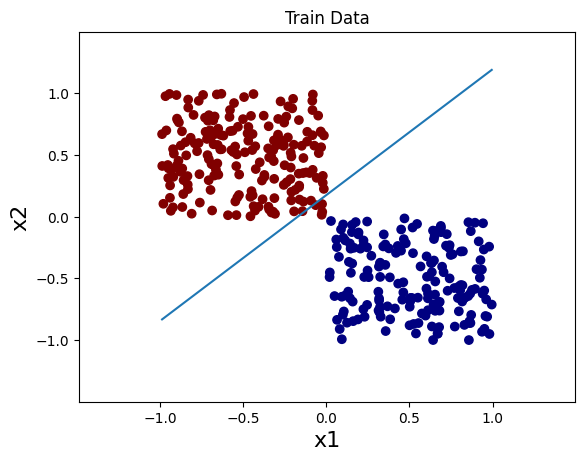

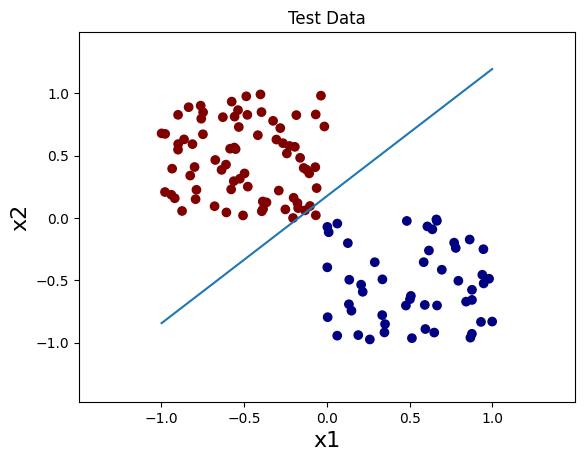

In [ ]:
def model_plot(model,X,y,title):
    parm = {}
    b = []
    for name, param in model.named_parameters():
        parm[name]=param.detach().numpy()  
    
    w = parm['linear.weight'][0]
    b = parm['linear.bias'][0]
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap='jet')
    u = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
    plt.xlim(X[:, 0].min()-0.5, X[:, 0].max()+0.5)
    plt.ylim(X[:, 1].min()-0.5, X[:, 1].max()+0.5)
    plt.xlabel('x1',fontsize=16) # Normally you can just add the argument fontweight='bold' but it does not work with latex
    plt.ylabel('x2',fontsize=16)
    plt.title(title)
    plt.show()


# Train Data
model_plot(model,X_labeled,y_labeled,'Train Data')

# Test Dataset Results
with torch.no_grad():
    y_pred = model(uX_val)
model_plot(model,X_val,y_pred,'Pred Data')
    
y_pred = y_pred.round().int()
model_plot(model,X_val,y_pred,'Pred Data Rounded')


In [ ]:
submit_results(model, uX_val, "0")